### 1. 深度学习介绍&数据操作

#### 1.1 课程介绍
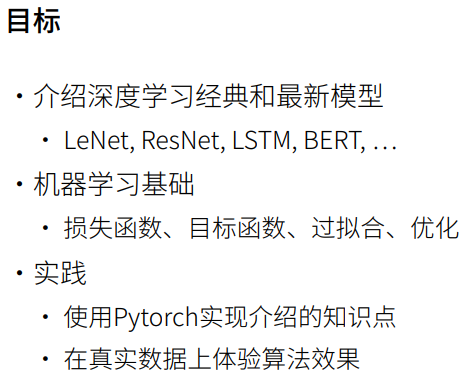 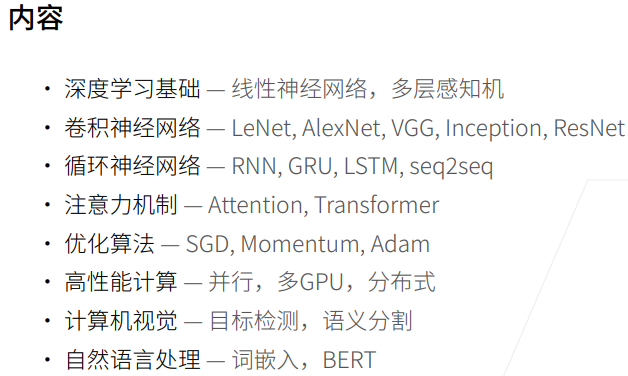  
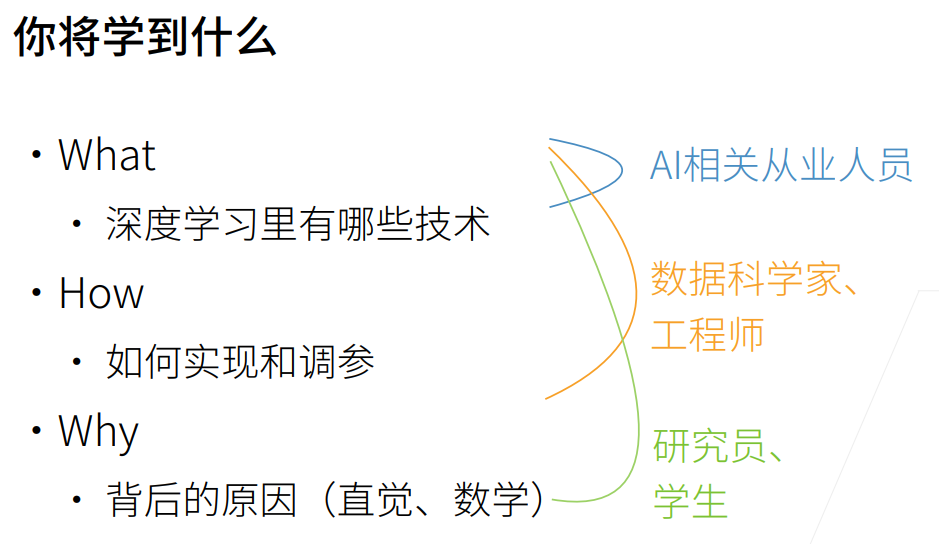

#### 1.2 深度学习介绍
**热门领域：**
1. 自然语言处理2. 计算机视觉

**实例：**
1. 图片分类
2. 物体检测与分割
3. 样式迁移
4. 人脸合成
5. 文字生成图片
6. 文字生成
7. 无人驾驶
8. 推荐系统

#### 1.3 安装


In [1]:
import torch
import d2l

#### 1.4 数据操作
1. 获取数据
2. 将数据读入计算机后对其进行处理

**N维数组：**  
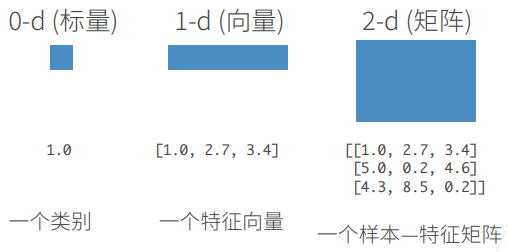  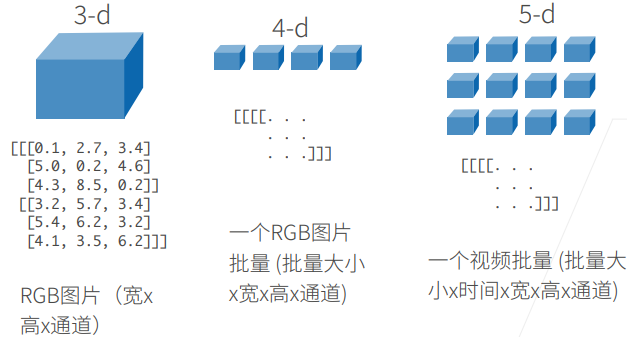  
**创建数组：** 
1. 数组形状
2. 每个元素数据类型
3. 每个元素的值
    
**访问元素**

**数据操作实现:**

In [2]:
import torch

In [3]:
x = torch.arange(12) #连续值
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
x.shape #形状

torch.Size([12])

In [5]:
x.numel() #元素个数

12

In [6]:
x = x.reshape(3, 4) #改变形状
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
x = torch.zeros((2, 3, 4)) # 2个3x4的全0张量
x

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
x = torch.ones((2, 3, 4)) # 2个3x4的全1张量
x

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]]).reshape(3, 3, 1) #创建指定的张量

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])

In [10]:
#运算
x = torch.tensor([1.0, 2, 3])
y = torch.tensor([2, 3, 4])
x + y, x - y, x * y, x / y, x**y, torch.exp(x) 

(tensor([3., 5., 7.]),
 tensor([-1., -1., -1.]),
 tensor([ 2.,  6., 12.]),
 tensor([0.5000, 0.6667, 0.7500]),
 tensor([ 1.,  8., 81.]),
 tensor([ 2.7183,  7.3891, 20.0855]))

In [11]:
#连接
x = torch.arange(12).reshape(3, 4)
y = torch.ones((3, 4))
torch.cat((x, y), dim=0), torch.cat((x, y), dim=1) 

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  1.,  1.,  1.,  1.],
         [ 4.,  5.,  6.,  7.,  1.,  1.,  1.,  1.],
         [ 8.,  9., 10., 11.,  1.,  1.,  1.,  1.]]))

In [12]:
#求和
x.sum() 

tensor(66)

In [13]:
#判断
x == y 

tensor([[False,  True, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [14]:
#广播
a = torch.arange(3).reshape(1, 3)
b = torch.arange(2).reshape(2, 1)
a, b, a + b

(tensor([[0, 1, 2]]),
 tensor([[0],
         [1]]),
 tensor([[0, 1, 2],
         [1, 2, 3]]))

In [15]:
#切片
x = torch.arange(12).reshape(3, 4)
x, x[-1], x[1:3]

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([ 8,  9, 10, 11]),
 tensor([[ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

In [16]:
x[1, 2]

tensor(6)

In [17]:
x[0:2, :]

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [18]:
#运行一些操作可能会为新结果分配内存
y = torch.arange(12).reshape(3, 4)
x = torch.arange(12).reshape(3, 4)
before = id(y)
y = y + x
id(y) == before

False

In [19]:
#原地操作
z = torch.zeros_like(y)
print(f"id(z):{id(z)}")
z[:] = x + y
print(f"id(z):{id(z)}")

id(z):2404665457936
id(z):2404665457936


In [20]:
# 对于重复使用的变量 可以使用 X[:] or X += Y 来减小开销
before = id(y)
y += x
id(y) == before

True

In [21]:
# 转 Numpy 张量
a = x.numpy()
b = torch.tensor(a)
a.dtype, b.dtype

(dtype('int64'), torch.int64)

In [22]:
# 张量转标量
a = torch.tensor([2.3])
a, a.item(), float(a), int(a)

(tensor([2.3000]), 2.299999952316284, 2.299999952316284, 2)

#### 1.5 数据预处理操作

**创建人工数据集：**

In [23]:
import os
'''
    os.makedirs(name, mode=511, exist_ok=False) ---> 用于递归创建多层目录
    参数:
    path -- 需要递归创建的目录，可以是相对或者绝对路径
    mode -- 权限模式，默认的模式为 511 (八进制)
    exist_ok：是否在目录存在时触发异常。如果 exist_ok 为 False（默认值），则在目标目录已存在的情况下触发 FileExistsError 异常；如果 exist_ok 为 True，则在目标目录已存在的情况下不会触发 FileExistsError 异常。

    os.path.join(path, *paths) ---> 用于路径拼接文件路径，可以传入多个路径
    返回值将是 path 和所有 *paths 成员的拼接
    如果不存在以'/'开始的参数，则函数会自动加上 存在以'/'开始的参数，从最后一个以'/'开头的参数开始拼接，之前的参数全部丢弃
'''
os.makedirs(os.path.join('D:/JupyterNotebookCode', 'txt'), exist_ok=True) 
data_file = os.path.join('D:/JupyterNotebookCode', 'txt', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

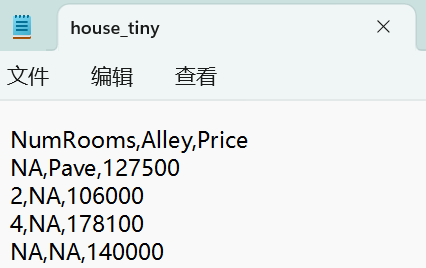

**加载数据集：**

In [24]:
import pandas as pd

data = pd.read_csv('D:/JupyterNotebookCode/txt/house_tiny.csv')
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


**插值处理缺失数据：**

In [27]:
inputs_before, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = data.fillna(inputs_before.mean(numeric_only = True)) #忽略非数值
inputs_before, inputs

(   NumRooms Alley
 0       NaN  Pave
 1       2.0   NaN
 2       4.0   NaN
 3       NaN   NaN,
    NumRooms Alley   Price
 0       3.0  Pave  127500
 1       2.0   NaN  106000
 2       4.0   NaN  178100
 3       3.0   NaN  140000)

**对于inputs中的类别值或离散值，我们将“NaN”视为一个类别:**

In [28]:
'''
    pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)实现one hot encode
    参数详解
    data : array-like, Series, or DataFrame 输入的数据
    prefix : string, get_dummies转换后，列名的前缀，默认为None
    columns : 指定需要实现类别转换的列名 否则转换所有类别性的列
    dummy_na : bool, default False 增加一列表示空缺值，如果False就忽略空缺值
    drop_first : bool, default False 获得k中的k-1个类别值，去除第一个,防止出现多重共线性
'''
inputs = pd.get_dummies(inputs, dummy_na=True, dtype=int)
inputs

,NumRooms,Price,Alley_Pave,Alley_nan
0,3.0,127500,1,0
1,2.0,106000,0,1
2,4.0,178100,0,1
3,3.0,140000,0,1


**转换为张量格式:**

In [29]:
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3.0000e+00, 1.2750e+05, 1.0000e+00, 0.0000e+00],
         [2.0000e+00, 1.0600e+05, 0.0000e+00, 1.0000e+00],
         [4.0000e+00, 1.7810e+05, 0.0000e+00, 1.0000e+00],
         [3.0000e+00, 1.4000e+05, 0.0000e+00, 1.0000e+00]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

In [30]:
import numpy as np
a = np.arange(12)
b = a.reshape((3, 4))
b[:] = 2
a, b

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([[2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2]]))

### 2. 线性代数&自动求导

#### 2.1 线性代数及其实现

#### 2.2 矩阵计算

**标量的导数：** 导数是切线的斜率  
**亚导数：** 将导数拓展到不可微的函数  
**梯度：** 将导数拓展到向量 ---> 指向值变换最大的方向  

#### 2.3 自动求导

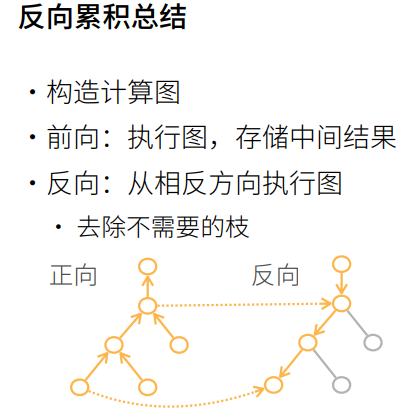 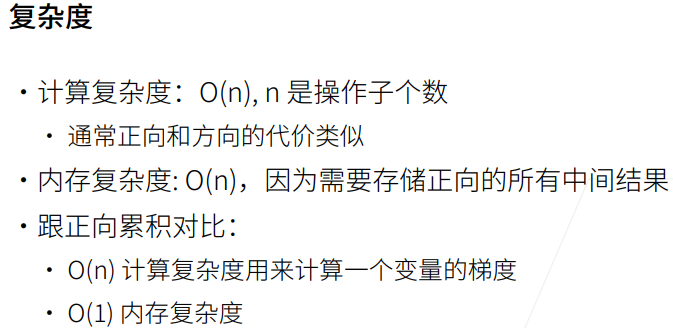

**向量梯度计算：**  

***
<a href="https://www.cnblogs.com/zhouyang209117/p/11023160.html">Pytorch中backward函数的gradient参数作用</a>

In [31]:
import torch

x = torch.arange(4.0)
# x.requires_grad = True
x.requires_grad_(True) # 开始追踪(track)在其上的所有操作（利用链式法则进行梯度传播了）
'''
    dot函数
    一维数组：计算两个一维数组的内积（即点积）
    二维数组：进行矩阵乘法
    多维数组：按照传统的矩阵乘法规则计算其对应的相乘
'''
# y = 2 * x.dot(x)
y = 2 * torch.dot(x, x)
y.backward()
print(x.grad) 
x.grad == 4*x

tensor([ 0.,  4.,  8., 12.])


tensor([True, True, True, True])

In [32]:
# x.grad.data.zero_()
x.grad.zero_() # 不对计算图梯度清零 后续计算梯度会累加
y =2 * x.sum() # 不允许张量对张量求导，只允许标量对张量求导，求导结果是和自变量同形的张量。所以必要时我们要把张量通过将所有张量的元素加权求和的方式转换为标量
y.backward()
x.grad

tensor([2., 2., 2., 2.])

批量中每个样本单独计算偏导之和

In [33]:
x.grad.zero_() # grad在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以一般在反向传播之前需把梯度清零
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [34]:
x.grad.zero_()
y = x * x
u = y.detach() # detach()的作用是返回一个 Tensor 和原张量的数据相同，但 requires_grad = False
z = u * x 

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [35]:
x.grad.zero_()
y.sum().backward()

x.grad == 2 * x 

tensor([True, True, True, True])

In [36]:
def f(a):
    b = a * 2
    '''
        1维sum(abs(A))
        2维sqrt(sum(abs(A.^2)))
        inf维max(sum(abs(A'))) ，其中sum(abs(A'))表示一行元素绝对值之和
    '''
    while b.norm() < 1000: # 求范数 
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

# a = torch.randn(2, 3, requries_grad=True) # 服从标准正态分布（均值为0，方差为1，即高斯白噪声）中抽取的一组随机数
a = torch.randn(3, 4, requires_grad = True) 
d = f(a)
d.sum().backward()

a.grad == d / a

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### 3. 线性回归

#### 3.1 线性回归
线性模型可以看作是单层神经网络  
数据集称为训练数据集（training data set）或训练集（training set）  
每行数据（比如一次房屋交易相对应的数据）称为样本（sample），也可以称为数据点（data point）或数据样本（data instance）  
把试图预测的目标（比如预测房屋价格）称为标签（label）或目标（target）   
预测所依据的自变量（面积和房龄）称为特征（feature）或协变量（covariate）  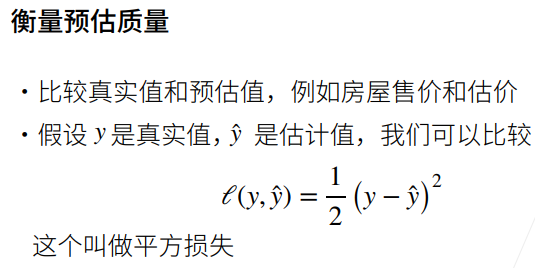 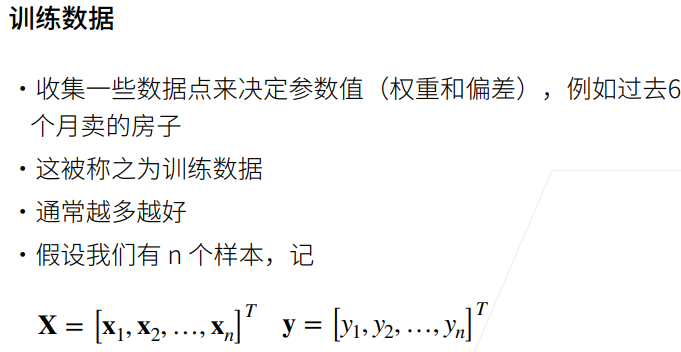
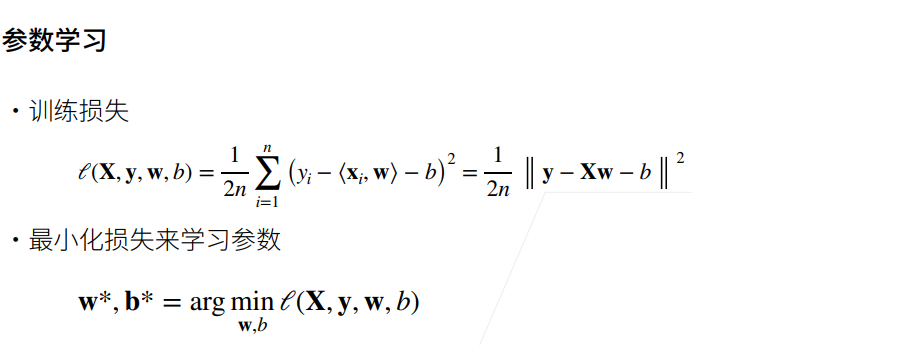 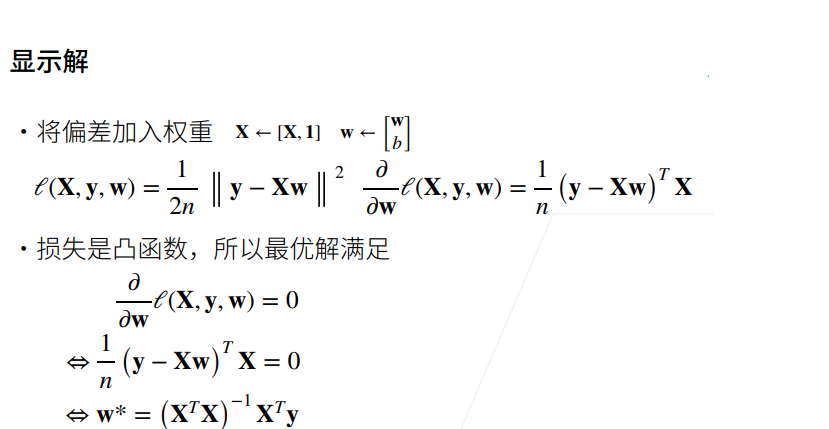


#### 3.2 基础优化算法
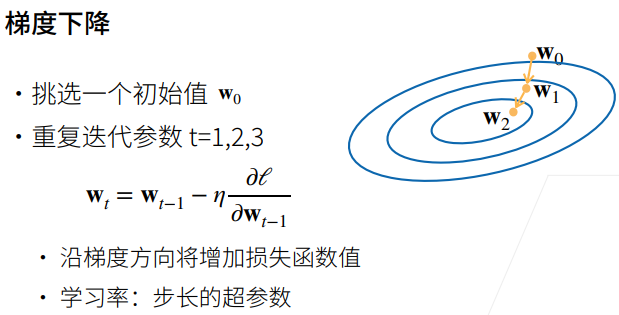 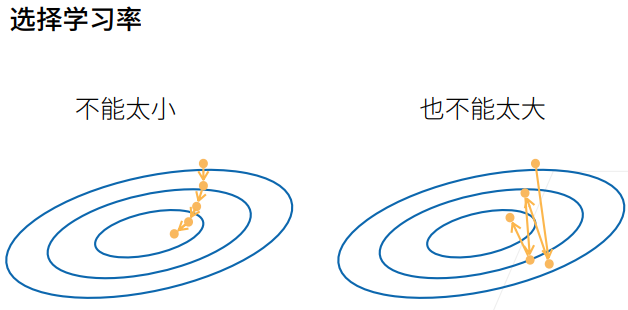
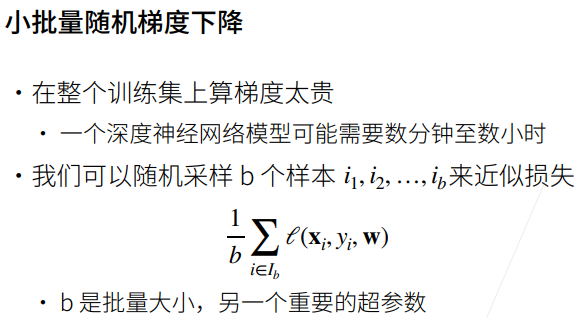  
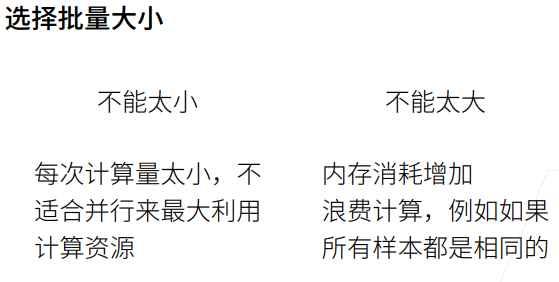

#### 3.3 线性回归从零开始实现

**生成数据集：**  
y = Xw + b +噪声  
1000个样本 2个特征

In [37]:
import random
import torch
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):
    ''' 生成y = Xw + b + 噪声 '''
    X = torch.normal(0, 1, (num_examples, len(w))) # 服从均值为 0 标准差为 1 的正态分布随机数  形状 num_examples * len(w)
    y = torch.matmul(X, w) + b # y = X*w + b
    y += torch.normal(0, 0.01, y.shape) # 加上噪声
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

**画features-labels散点图：**

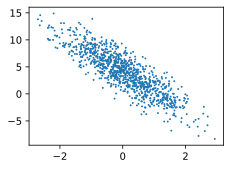

In [38]:
d2l.set_figsize()
# matplotlib.pyplot.scatter(x, y, s=None) s--->点的大小，默认 20
d2l.plt.scatter(features[:, 1].detach().numpy(), 
                labels.detach().numpy(), 1) 

***
<a href="https://docs.pythontab.com/interpy/Generators/Generators/">生成器</a>   

**读取数据：**  
小批量读取

In [39]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 生成样本的标签
    random.shuffle(indices) # 打乱标签
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)]) 
        yield features[batch_indices], labels[batch_indices]

In [40]:
batch_size = 5

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.2197, -0.7962],
        [ 0.7329,  0.0054],
        [ 0.5160, -1.1333],
        [-1.2357, -0.6864],
        [ 1.0646,  0.2492]]) 
 tensor([[7.3585],
        [5.6513],
        [9.0829],
        [4.0657],
        [5.4794]])


**初始化模型参数：**

In [41]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

**定义模型：**

In [42]:
def linreg(X, w, b):  
    """线性回归模型"""
    return torch.matmul(X, w) + b

**定义损失函数：**

In [43]:
def squared_loss(y_hat, y):  
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

**定义优化算法：**

In [44]:
def sgd(params, lr, batch_size): 
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

**训练：**

In [45]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000200
epoch 2, loss 0.000051
epoch 3, loss 0.000051
epoch 4, loss 0.000051
epoch 5, loss 0.000052


In [46]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0002, -0.0010], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0011], grad_fn=<RsubBackward1>)


#### 3.4 线性回归的简洁实现

In [1]:
import numpy as np
import torch 
from torch.utils import data
from d2l import torch as d2l 

true_w = torch.tensor([2, -3.4])
ture_b = 4.2
'''
    def synthetic_data(w, b, num_examples): 
    """Generate y = Xw + b + noise.

    Defined in :numref:`sec_utils`"""
    X = d2l.normal(0, 1, (num_examples, len(w)))
    y = d2l.matmul(X, w) + b
    y += d2l.normal(0, 0.01, y.shape)
    return X, d2l.reshape(y, (-1, 1))
'''
features, labels = d2l.synthetic_data(true_w, ture_b, 1000) # 生成 y = Xw + b + 噪声

**读取数据：**

In [48]:
def load_array(data_arrays, batch_size, is_train=True):
    ''' 构造一个PyTorch数据迭代器 '''
    dataset = data.TensorDataset(*data_arrays) # 将*data_arrays打包成一个数据集 *data_arrays中*表示解压缩data_arrays元组
    return data.DataLoader(dataset, batch_size, shuffle=is_train) # 将 data.TensorDataset()打包的数据集转换成一个迭代器

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter)) # iter构造Python迭代器，并使用next从迭代器中获取第一项

[tensor([[-0.6647,  0.0782],
         [ 1.4043, -0.8200],
         [-0.5851,  0.8443],
         [-0.5616,  1.3225],
         [ 0.7400,  2.5747],
         [-0.5506,  1.0171],
         [-2.0703,  0.7316],
         [-1.1377,  0.2883],
         [-1.5676, -0.1794],
         [ 1.4817, -2.0220]]),
 tensor([[ 2.5918],
         [ 9.7927],
         [ 0.1669],
         [-1.4150],
         [-3.0649],
         [-0.3592],
         [-2.4121],
         [ 0.9446],
         [ 1.6665],
         [14.0163]])]

**使用框架预定好的层：**

In [49]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) # list of layers 一个有序的容器，神经网络模块将按照在传入构造器的顺序依次被添加到计算图中执行，同时以神经网络模块为元素的有序字典也可以作为传入参数

**初始化模型参数：**

In [50]:
net[0].weight.data.normal_(0, 0.01) # net[0]选择网络中的第一个图层， 然后使用weight.data和bias.data方法访问参数 使用替换方法normal_和fill_来重写参数值
net[0].bias.data.fill_(0)

tensor([0.])

**定义损失函数：**

In [51]:
loss = nn.MSELoss()

**定义优化算法：**

In [52]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03) 

**训练：**

In [53]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000347
epoch 2, loss 0.000098
epoch 3, loss 0.000097


In [54]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 0.0002, -0.0007])
b的估计误差： tensor([-0.0003])


Q：损失为什么要求平均？  
A：求不求均可。不求的话，会导致梯度比较大（N倍），也可以学习率求平均。  

Q：如何找到合适的学习率？  
A：1.使用对学习率不那么敏感的算法 2.合理的参数初始化

### 4. Softmax回归

#### 4.1 Softmax回归
回归估计一个连续值  
分类预测离散类别  
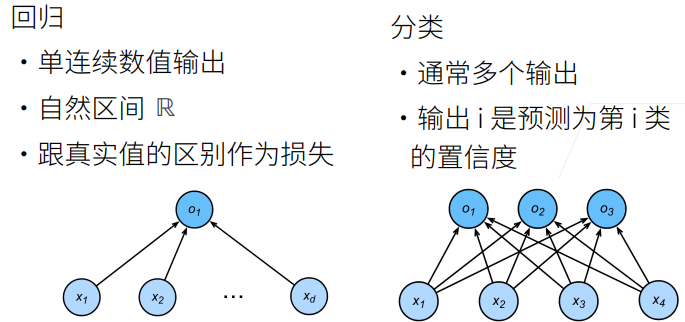  
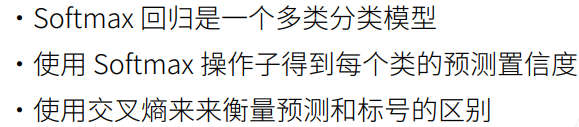

#### 4.2 损失函数
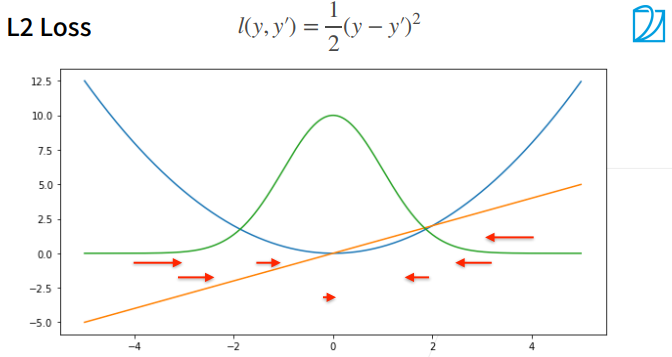 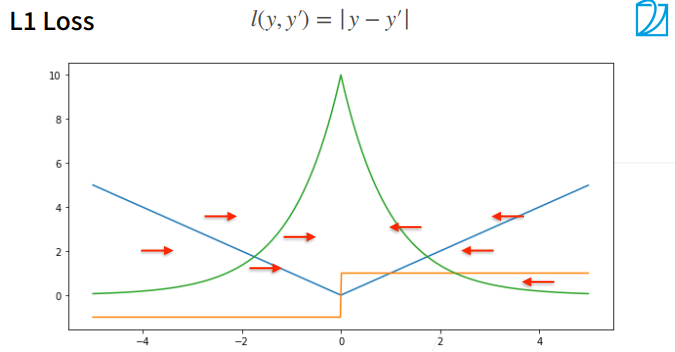  
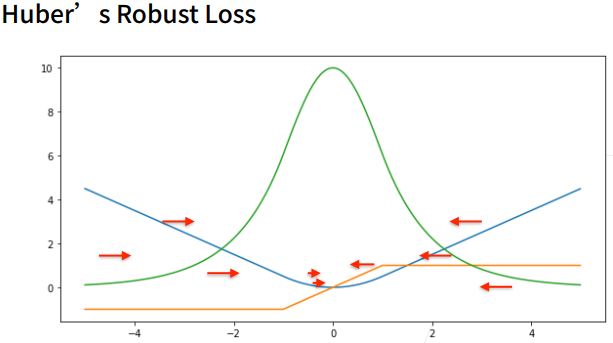

#### 4.3 图像分类数据集


In [55]:
import torch
import torchvision 
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display() #使用svg格式在jupyter里面显示

**下载数据并读取：**

In [56]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="D:/JupyterNotebookCode/txt/FashionMNIST/", 
                                                train=True, 
                                                transform=trans, 
                                                download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="D:/JupyterNotebookCode/txt/FashionMNIST/", 
                                               train=False, 
                                               transform=trans, 
                                               download=True)

len(mnist_train), len(mnist_test)

(60000, 10000)

In [57]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

**可视化数据：**

In [58]:
def get_fashion_mnist_labels(labels):  
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels] # 列表解析（List Comprehensions）---> 将一个列表（实际上适用于任何可迭代对象）转换成另一个列表

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize) #fig, ax = plt.subplots(num_rows, num_cols, figsize=figsize),一共有num_rows * num_cols个子图像
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

**几个样本图像及标签：**

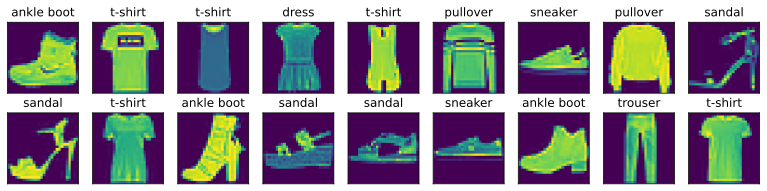

In [59]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18))) # next函数可以用于获取可迭代对象的下一个元素 结合iter函数一起使用，创建一个迭代器来遍历可迭代对象
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

**读小批量数据：**

In [60]:
batch_size = 256

def get_dataloader_workers():  
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [61]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'4.21 sec'

**整合所有组件：**

In [62]:
def load_data_fashion_mnist(batch_size, resize=None): 
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="D:/JupyterNotebookCode/txt/FashionMNIST/", 
                                                    train=True, 
                                                    transform=trans, 
                                                    download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="D:/JupyterNotebookCode/txt/FashionMNIST/", 
                                                   train=False, 
                                                   transform=trans, 
                                                   download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

#### 4.4 Softmax回归从零开始实现


In [63]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

**展平：**

In [64]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

**求和sum()降维**

In [65]:
X = torch.tensor([[1.0, 2.0, 3.0], 
                  [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

**实现softmax：**

In [66]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

In [67]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.6274, 0.0585, 0.0220, 0.2540, 0.0381],
         [0.0941, 0.0640, 0.3421, 0.0198, 0.4800]]),
 tensor([1.0000, 1.0000]))

**定义模型：**

In [68]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [69]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], 
                      [0.3, 0.2, 0.5]])
'''
    y = [0, 2]
    拿出y_hat中[0, 0] [1, 2]对应的值
'''
y_hat[[0, 1], y] 

tensor([0.1000, 0.5000])

**实现交叉熵损失函数：**

In [70]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

**预测值与真实值比较：**

In [71]:
def accuracy(y_hat, y): 
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [72]:
accuracy(y_hat, y) / len(y)

0.5

**评估任意模型的准确率：**

In [73]:
def evaluate_accuracy(net, data_iter):  
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module): # isinstance() 函数判断 net 是否属于 torch.nn.Module 类或其子类的实例
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [74]:
class Accumulator:  
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [75]:
evaluate_accuracy(net, test_iter)

0.0398

**训练：**

In [76]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

**动画中绘制数据：**

In [77]:
class Animator:  
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [78]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater): 
    """训练模型"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [79]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

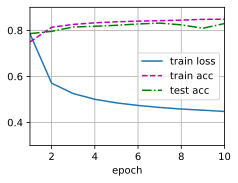

In [80]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

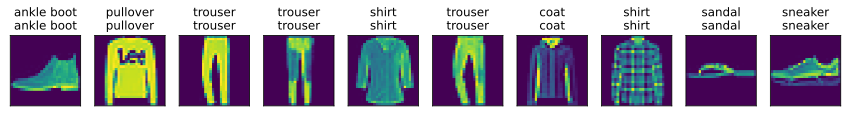

In [81]:
def predict_ch3(net, test_iter, n=10):  
    """预测标签"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

#### 4.5 softmax回归的简洁实现

In [82]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

**初始化模型参数：**

In [83]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

**损失函数：**

In [84]:
loss = nn.CrossEntropyLoss(reduction='none')

**优化器：**

In [85]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

**训练：**

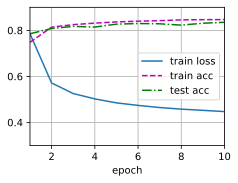

In [86]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 5. 感知机

#### 5.1 感知机

**ReLU函数：**

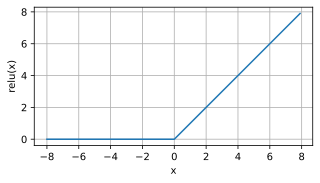

In [87]:
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

**ReLU导数函数：**

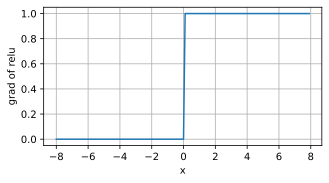

In [88]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

**sigmoid函数：**

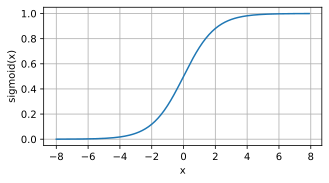

In [89]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

**sigmoid导数函数：**

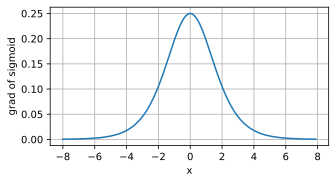

In [90]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

**tanh函数：**

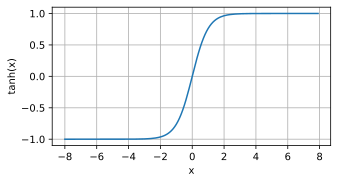

In [91]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

**tanh导数函数：**

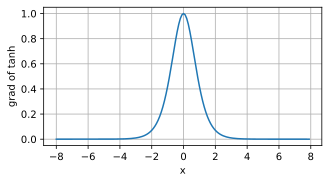

In [92]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

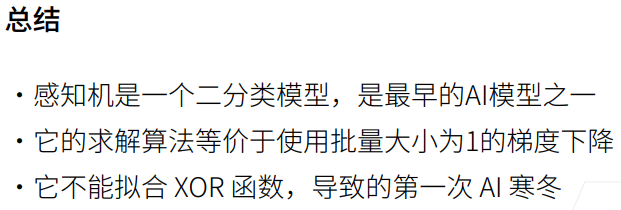
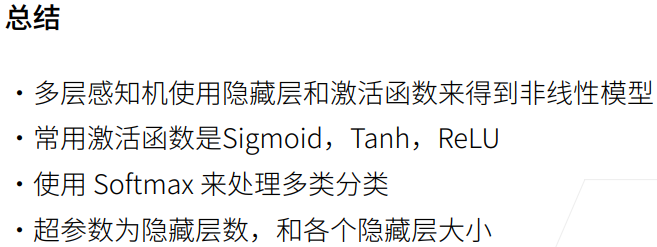

#### 5.2 多层感知机从零开始实现

In [93]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

**初始化模型参数：**

In [94]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01) # nn.Parameter只是说明是torch中的Parameter 加不加均可
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

**激活函数：**

In [95]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

**模型：**

In [96]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X @ W1 + b1)
    return (H @ W2 + b2)

**损失函数：**

In [97]:
loss = nn.CrossEntropyLoss(reduction='none')

**训练：**

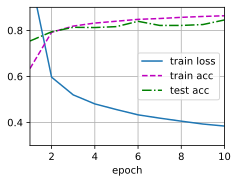

In [98]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

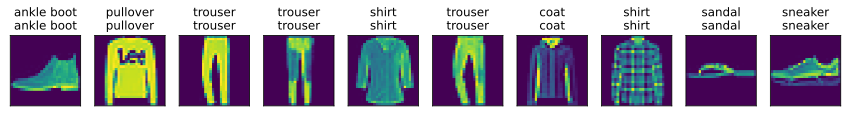

In [99]:
predict_ch3(net, test_iter)

#### 5.3 多层感知机的简洁实现

In [100]:
import torch
from torch import nn
from d2l import torch as d2l

**模型：**

In [101]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

**损失函数：**

In [102]:
loss = nn.CrossEntropyLoss(reduction='none')

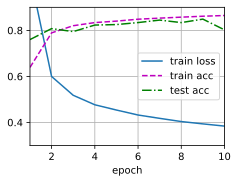

In [103]:
batch_size, lr, num_epochs = 256, 0.1, 10
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 6. 模型选择和拟合

#### 6.1 模型选择
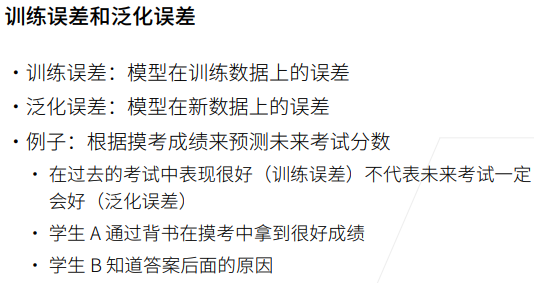  
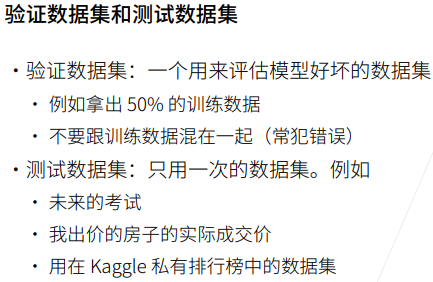  
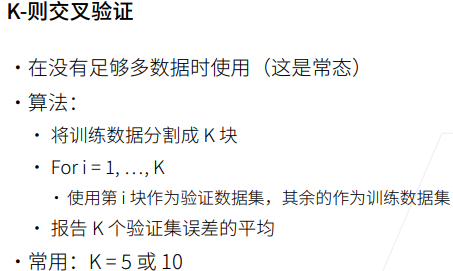

#### 6.2 过拟合和欠拟合
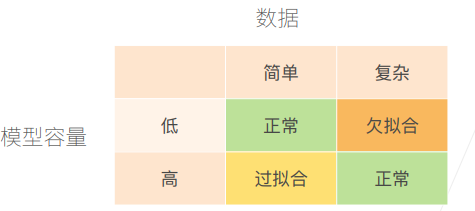  
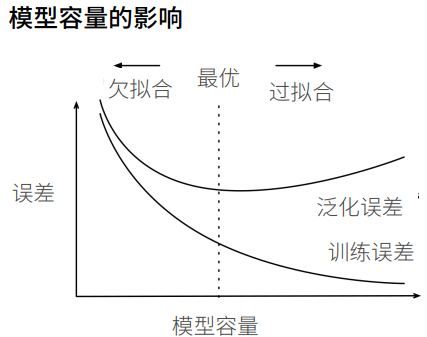  
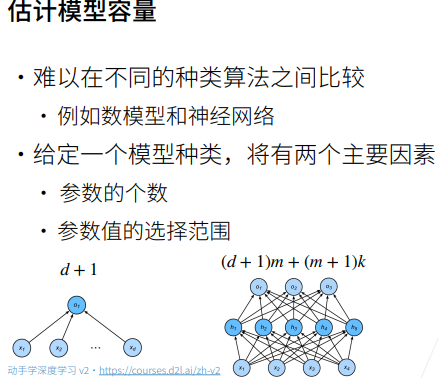   
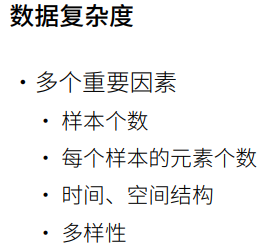

In [104]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

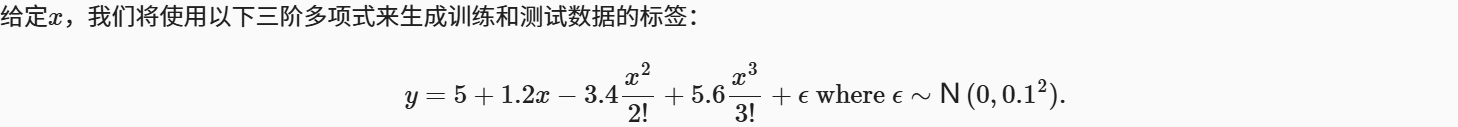

In [105]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [106]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.6191],
         [-0.2791]]),
 tensor([[ 1.0000e+00, -6.1907e-01,  1.9162e-01, -3.9543e-02,  6.1199e-03,
          -7.5773e-04,  7.8181e-05, -6.9142e-06,  5.3505e-07, -3.6803e-08,
           2.2784e-09, -1.2823e-10,  6.6150e-12, -3.1501e-13,  1.3930e-14,
          -5.7489e-16,  2.2244e-17, -8.1002e-19,  2.7859e-20, -9.0771e-22],
         [ 1.0000e+00, -2.7912e-01,  3.8953e-02, -3.6241e-03,  2.5289e-04,
          -1.4117e-05,  6.5672e-07, -2.6186e-08,  9.1361e-10, -2.8334e-11,
           7.9085e-13, -2.0067e-14,  4.6675e-16, -1.0021e-17,  1.9980e-19,
          -3.7178e-21,  6.4856e-23, -1.0648e-24,  1.6512e-26, -2.4257e-28]]),
 tensor([3.2177, 4.5405]))

In [107]:
def evaluate_loss(net, data_iter, loss):  
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [108]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

**三阶多项式函数拟合(正常)：**

weight: [[ 5.01858    1.1935271 -3.4276073  5.6143827]]


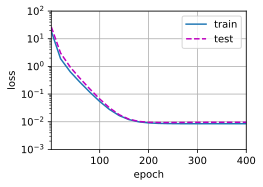

In [109]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

**线性函数拟合(欠拟合)：**

weight: [[3.4503195 3.613269 ]]


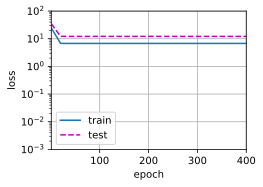

In [110]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

**高阶多项式函数拟合(过拟合)：**

weight: [[ 4.99993     1.2891841  -3.3420842   5.1502924  -0.2209859   1.199032
  -0.06112915  0.22235188 -0.16230537 -0.09566905  0.10197955 -0.10429691
   0.00987187 -0.12665895 -0.07245338 -0.17576866  0.01623036  0.10096439
  -0.0998816   0.1666418 ]]


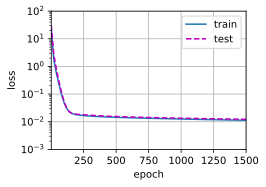

In [111]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

### 7. 权重衰减和暂退法

#### 7.1 权重衰减

权重衰减是一种常用的正则化技术，它通过对模型的权重参数进行惩罚来实现正则化，通过降低模型的复杂度，减少过拟合的风险  
权重衰减会向损失函数中添加一个权重惩罚项，这个惩罚项的大小与权重参数的平方成正比，这样可以鼓励模型的权重参数变得更加接近于0，从而减小模型的复杂度
***
正则化是正则化系数的过程，即对系数进行惩罚，通过向模型添加额外参数来防止模型过度拟合  
<a href="https://fuxi.163.com/database/774">权重衰减</a>

**损失函数：**  
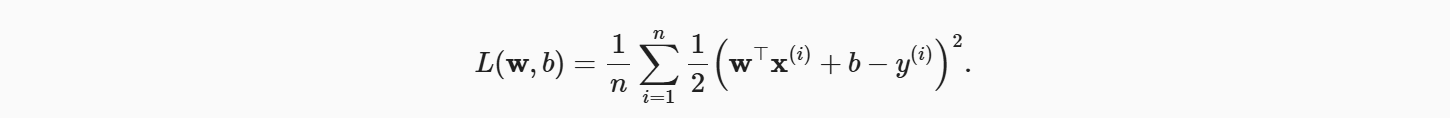  
**添加一个权重惩罚项的损失函数：**  
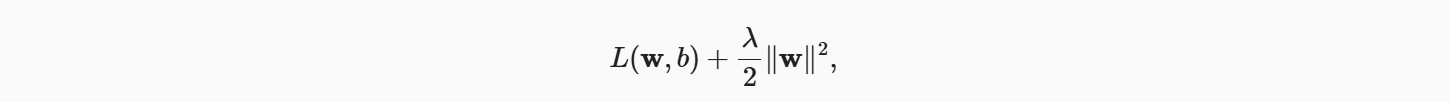  
**$L_2$正则化回归的小批量随机梯度下降：**  
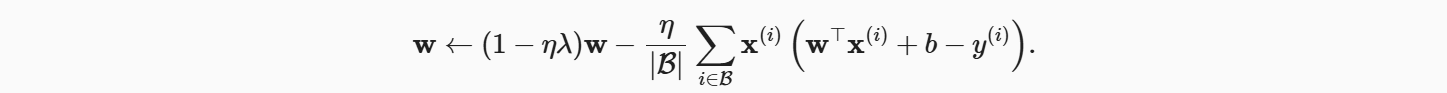

**从零开始实现：**

In [112]:
import torch
from torch import nn
from d2l import torch as d2l

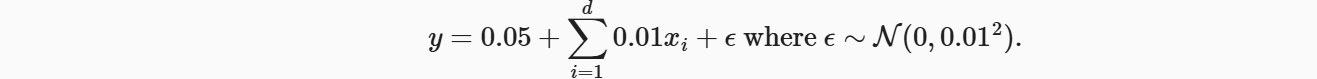

In [113]:
# 
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05

train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)

test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

**初始化模型参数：**

In [114]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

**定义$L_2$范数惩罚：**

In [115]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2 # x.pow(y)返回 x 的 y 次方的值

**定义训练：**

In [116]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

**忽略正则化直接训练：**

w的L2范数是： 12.83933162689209


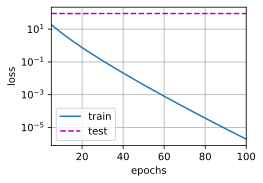

In [117]:
train(lambd=0)

**使用正则化直接训练：**

w的L2范数是： 0.35565662384033203


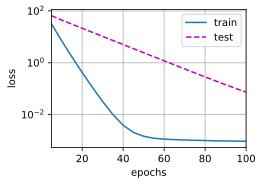

In [118]:
train(lambd=3)

**简洁实现：**

In [119]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([{"params":net[0].weight,'weight_decay': wd}, #weight_decay是权重衰减 L2正则化前面的λ参数
                               {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 14.471635818481445


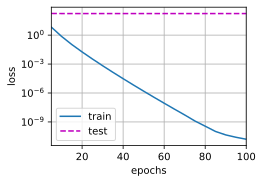

In [120]:
train_concise(0)

w的L2范数： 0.4296727180480957


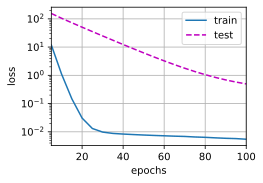

In [121]:
train_concise(3)

#### 7.2 暂退法(Dropout)


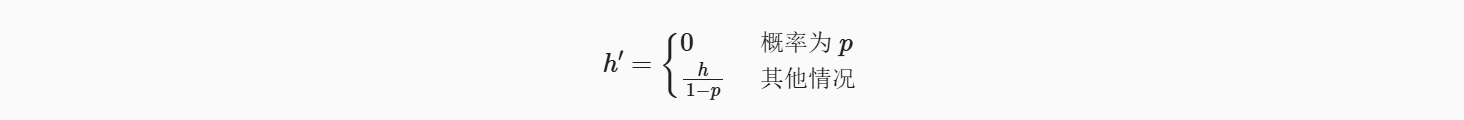  
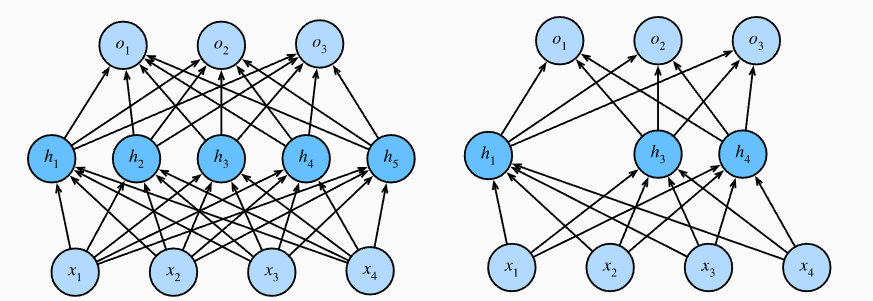

**从零开始实现：**

In [122]:
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1 # 不满足条件 报错 AssertionError
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [123]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  4.,  6.,  8., 10.,  0., 14.],
        [ 0., 18.,  0., 22., 24., 26.,  0., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


**定义模型参数：**

In [124]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

**定义模型：**

In [125]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

**训练和测试：**

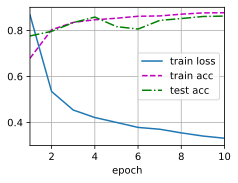

In [126]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

**简洁实现：**

In [127]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    # 在第一个全连接层之后添加一个dropout层
                    nn.Dropout(dropout1),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    # 在第二个全连接层之后添加一个dropout层
                    nn.Dropout(dropout2),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

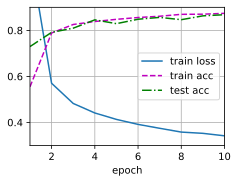

In [128]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 8. 数值稳定性与模型初始化

#### 8.1 数值稳定性

梯度不稳定问题 ---> 梯度消失问题和梯度爆炸问题 ---> 链式法则
***
<a href="https://www.cnblogs.com/PythonLearner/p/13173560.html">梯度消失与梯度爆炸及其解决方法</a> 

**梯度消失：**  
sigmoid用作激活函数是导致梯度消失问题的一个常见的原因  
**σ为sigmoid函数，C表示的是损失函数：**  
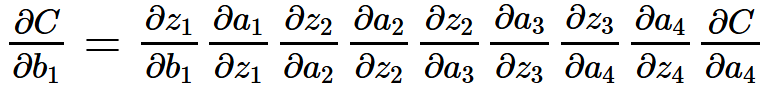
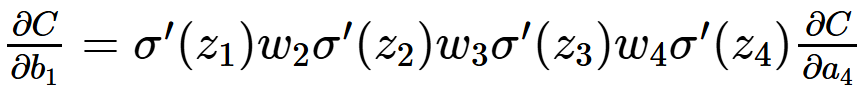

Max_Gradient 0.25


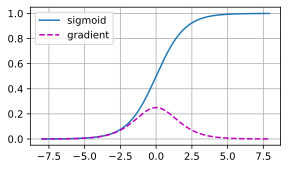

In [129]:
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

print('Max_Gradient', x.grad.numpy().max())
d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

**梯度爆炸：**  
当这种情况是由于深度网络的初始化所导致时，我们没有机会让梯度下降优化器收敛

In [130]:
M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[-0.2900,  0.9660,  0.7341, -0.4988],
        [-0.0667, -0.4689,  0.4491, -0.5338],
        [ 0.8388, -1.9533, -0.1921,  2.2743],
        [-0.5842,  0.3075,  0.8486,  0.4059]])
乘以100个矩阵后
 tensor([[ 2.9518e+22,  9.0399e+22,  1.2006e+23,  5.6064e+22],
        [ 4.6311e+21,  1.4182e+22,  1.8836e+22,  8.7956e+21],
        [-4.3621e+22, -1.3359e+23, -1.7742e+23, -8.2850e+22],
        [ 3.0938e+22,  9.4749e+22,  1.2584e+23,  5.8761e+22]])


#### 8.2 模型初始化和激活函数
**合理的权重初始值和激活函数的选取可以提升数值稳定性**

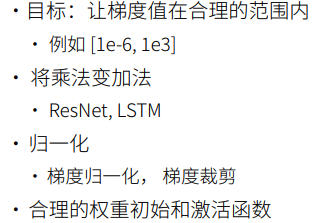  

#### 8.3 实战Kaggle比赛：预测房价

**下载和缓存数据集：**

In [51]:
import hashlib
import os
import tarfile
import zipfile
import requests


DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

In [52]:
def download(name, cache_dir=os.path.join('D:/JupyterNotebookCode/txt/', 'data')):  
    """下载一个DATA_HUB中的文件，返回本地文件名"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}"
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname  # 命中缓存
    print(f'正在从{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

In [53]:
def download_extract(name, folder=None):  
    """下载并解压zip/tar文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():  
    """下载DATA_HUB中的所有文件"""
    for name in DATA_HUB:
        download(name)

**访问和读取数据集：**

In [54]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [55]:
DATA_HUB['kaggle_house_train'] = (DATA_URL + 'kaggle_house_pred_train.csv',
                                  '585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = (DATA_URL + 'kaggle_house_pred_test.csv',
                                 'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

**分别加载包含训练数据和测试数据的两个CSV文件：**

In [56]:
train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

In [57]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [58]:
train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


训练集删除第0列ID和最后一列预测值  
测试集删除第0列ID

In [59]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

**数据预处理：**   
对连续数值的特征做标准化（standardization）：设该特征在整个数据集上的均值为μ，标准差为σ  
那么，我们可以将该特征的每个值先减去μ再除以σ得到标准化后的每个特征值；对于缺失的特征值，我们将其替换成该特征的均值

In [60]:
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index # 找出所有非字符串，即数值类的特征列
all_features[numeric_features] = all_features[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))
# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

**离散值使用独热编码替换：**  

In [61]:
# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True, dtype=int)
# all_features = all_features * 1 # 将true和false转换成1和0

**通过values属性得到NumPy格式的数据，并转成Tensor：**

In [62]:
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

**模型和损失函数：**

In [63]:
loss = nn.MSELoss()
in_features = train_features.shape[1]
print(in_features)

def get_net():
    net = nn.Sequential(nn.Linear(in_features, 128),
                        nn.ReLU(),
                        nn.Linear(128, 1))
    return net

330


**房价采用相对误差：**  
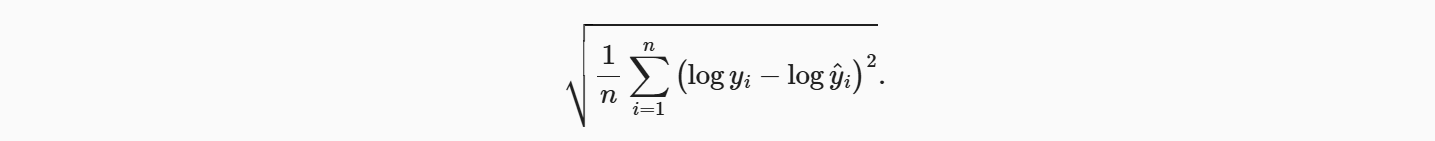

In [64]:
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf')) # 将 net(features) 限制在 1 到 float('inf') 之间
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()

**训练函数：**

In [65]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

**K折交叉验证：**

In [66]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

**返回训练和验证误差的平均值：**

In [67]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

**验证：**

折1，训练log rmse0.097572, 验证log rmse0.129949
折2，训练log rmse0.094160, 验证log rmse0.154673
折3，训练log rmse0.106607, 验证log rmse0.152843
折4，训练log rmse0.096130, 验证log rmse0.128858
折5，训练log rmse0.092777, 验证log rmse0.157192
5-折验证: 平均训练log rmse: 0.097449, 平均验证log rmse: 0.144703


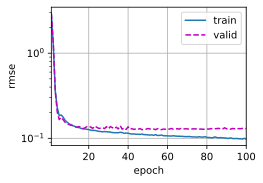

In [69]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0, 64

train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

**提交Kaggle预测：**

In [70]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    # 将网络应用于测试集
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

训练log rmse：0.097014


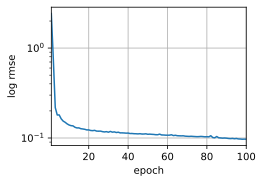

In [71]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

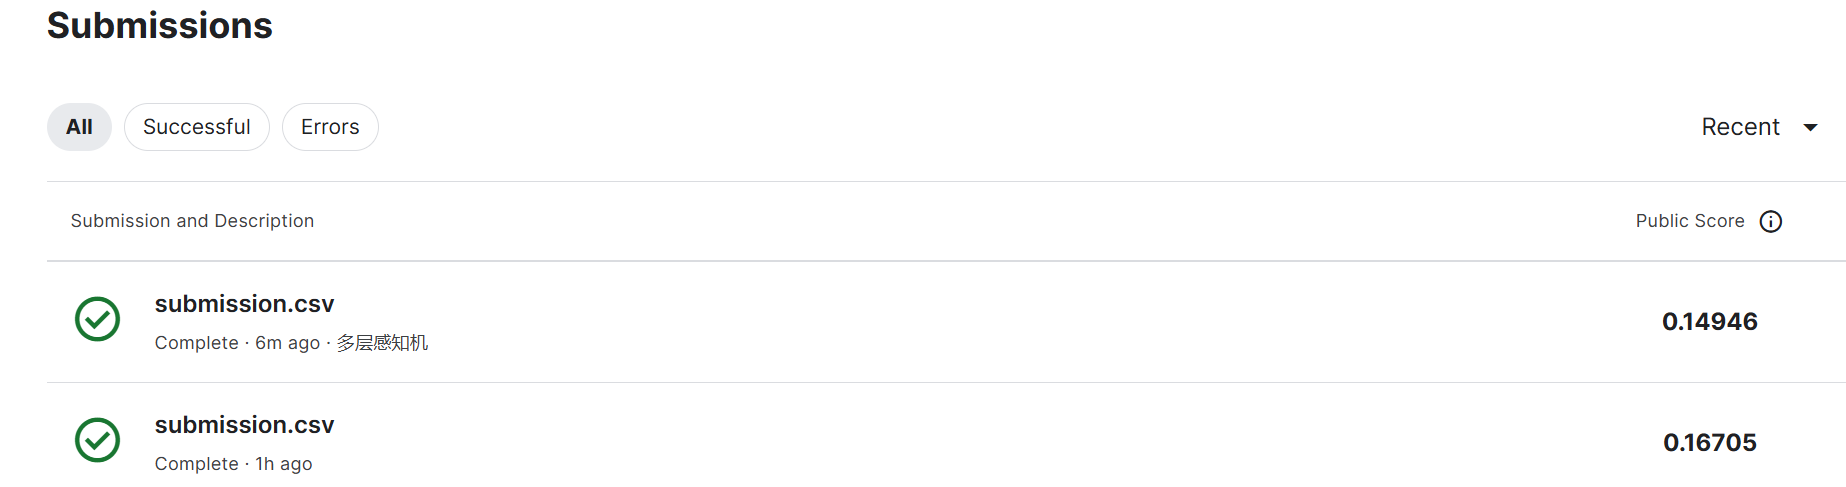

### 9. PyTorch神经网络基础
***
<a href="http://www.feiguyunai.com/index.php/2019/09/11/pytorch-char03/">PyTorch神经网络工具箱</a>  

#### 9.1 模型构造

**层和块：**

nn.Sequential定义了一种特殊的Module， 即在PyTorch中表示一个块的类

In [151]:
import torch
from torch import nn
from torch.nn import functional as F

net = nn.Sequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))

X = torch.rand(2, 20)
net(X)

tensor([[ 0.2063, -0.1034, -0.0884,  0.1915, -0.0946,  0.0065,  0.1123,  0.0156,
          0.0492, -0.1903],
        [ 0.2127, -0.1810,  0.0348,  0.2993, -0.1790,  0.0073,  0.1372,  0.0041,
          0.0441, -0.1833]], grad_fn=<AddmmBackward0>)

**自定义块：**

In [152]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)  
        self.out = nn.Linear(256, 10) 

    def forward(self, X):
        return self.out(F.relu(self.hidden(X)))

In [156]:
net = MLP()
net(X)

tensor([[-0.0922, -0.1302, -0.1768, -0.2809,  0.0128, -0.0582,  0.0028, -0.0709,
          0.0550, -0.0274],
        [-0.0204, -0.3803, -0.1251, -0.1884, -0.0059, -0.1126,  0.0004, -0.1092,
          0.1414, -0.1442]], grad_fn=<AddmmBackward0>)

**顺序快：**

In [162]:
class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for idx, module in enumerate(args):
            self._modules[idx] = module

    def forward(self, X):
        for block in self._modules.values():
            X = block(X)
        return X

In [163]:
net = MySequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))
net(X)

tensor([[ 0.2083, -0.0698,  0.0110,  0.0089, -0.1258,  0.2354, -0.2148,  0.0337,
          0.0687, -0.0226],
        [ 0.1010, -0.0407,  0.1575, -0.0407, -0.1978,  0.2552, -0.2456,  0.1095,
         -0.0344, -0.1326]], grad_fn=<AddmmBackward0>)

**任意代码集成到神经网络计算的流程中：**

In [165]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.rand_weight = torch.rand((20, 20), requires_grad=False)
        self.linear = nn.Linear(20, 20)

    def forward(self, X):
        X = self.linear(X)
        X = F.relu(torch.mm(X, self.rand_weight) + 1)
        # 复用全连接层。这相当于两个全连接层共享参数
        X = self.linear(X)
        # 控制流
        while X.abs().sum() > 1:
            X /= 2
        return X.sum()

In [166]:
net = FixedHiddenMLP()
net(X)

tensor(-0.1247, grad_fn=<SumBackward0>)

**混合搭配各种组合块：**

In [167]:
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(20, 64), nn.ReLU(),
                                 nn.Linear(64, 32), nn.ReLU())
        self.linear = nn.Linear(32, 16)

    def forward(self, X):
        return self.linear(self.net(X))

In [168]:
chimera = nn.Sequential(NestMLP(), nn.Linear(16, 20), FixedHiddenMLP())
chimera(X)

tensor(0.0313, grad_fn=<SumBackward0>)

#### 9.2 参数管理

单隐藏层的多层感知机:

In [170]:
import torch
from torch import nn

net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(), nn.Linear(8, 1))
X = torch.rand(size=(2, 4))
net(X)

tensor([[0.5257],
        [0.5075]], grad_fn=<AddmmBackward0>)

**参数访问：**

In [171]:
print(net[2].state_dict())

OrderedDict([('weight', tensor([[ 0.1657,  0.2902, -0.1030,  0.1761,  0.2451,  0.2540, -0.1909,  0.1073]])), ('bias', tensor([0.3422]))])


In [172]:
print(type(net[2].bias))
print(net[2].bias)
print(net[2].bias.data)

<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([0.3422], requires_grad=True)
tensor([0.3422])


In [173]:
net[2].weight.grad == None

True

In [175]:
# 一次性访问所有参数
print(*[(name, param.shape) for name, param in net[0].named_parameters()])
print(*[(name, param.shape) for name, param in net.named_parameters()])

('weight', torch.Size([8, 4])) ('bias', torch.Size([8]))
('0.weight', torch.Size([8, 4])) ('0.bias', torch.Size([8])) ('2.weight', torch.Size([1, 8])) ('2.bias', torch.Size([1]))


In [176]:
net.state_dict()['2.bias'].data

tensor([0.3422])

In [177]:
def block1():
    return nn.Sequential(nn.Linear(4, 8), nn.ReLU(),
                         nn.Linear(8, 4), nn.ReLU())

def block2():
    net = nn.Sequential()
    for i in range(4):
        # 在这里嵌套
        net.add_module(f'block {i}', block1())
    return net

rgnet = nn.Sequential(block2(), nn.Linear(4, 1))
rgnet(X)

tensor([[-0.4290],
        [-0.4290]], grad_fn=<AddmmBackward0>)

In [178]:
print(rgnet)

Sequential(
  (0): Sequential(
    (block 0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 1): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 2): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 3): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=4, out_features=1, bias=True)
)


In [179]:
rgnet[0][1][0].bias.data

tensor([-0.3341, -0.2954, -0.3900, -0.0437,  0.0756, -0.1648, -0.3071, -0.4936])

**参数初始化：**

In [180]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0, std=0.01)
        nn.init.zeros_(m.bias)
net.apply(init_normal)
net[0].weight.data[0], net[0].bias.data[0]

(tensor([ 0.0029,  0.0034,  0.0079, -0.0066]), tensor(0.))

In [181]:
def init_constant(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 1)
        nn.init.zeros_(m.bias)
net.apply(init_constant)
net[0].weight.data[0], net[0].bias.data[0]

(tensor([1., 1., 1., 1.]), tensor(0.))

In [182]:
def init_xavier(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
def init_42(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 42)

net[0].apply(init_xavier)
net[2].apply(init_42)
print(net[0].weight.data[0])
print(net[2].weight.data)

tensor([ 0.2306,  0.0864, -0.3438,  0.0161])
tensor([[42., 42., 42., 42., 42., 42., 42., 42.]])


**自定义初始化：**

In [183]:
def my_init(m):
    if type(m) == nn.Linear:
        print("Init", *[(name, param.shape)
                        for name, param in m.named_parameters()][0])
        nn.init.uniform_(m.weight, -10, 10)
        m.weight.data *= m.weight.data.abs() >= 5

net.apply(my_init)
net[0].weight[:2]

Init weight torch.Size([8, 4])
Init weight torch.Size([1, 8])


tensor([[ 0.0000,  0.0000, -0.0000,  0.0000],
        [ 0.0000, -9.1132, -5.5531, -0.0000]], grad_fn=<SliceBackward0>)

In [184]:
net[0].weight.data[:] += 1
net[0].weight.data[0, 0] = 42
net[0].weight.data[0]

tensor([42.,  1.,  1.,  1.])

**参数绑定：**

In [186]:
# 我们需要给共享层一个名称，以便可以引用它的参数
shared = nn.Linear(8, 8)
net = nn.Sequential(nn.Linear(4, 8), nn.ReLU(),
                    shared, nn.ReLU(),
                    shared, nn.ReLU(),
                    nn.Linear(8, 1))
net(X)
print(net[2].weight.data[0] == net[4].weight.data[0])
net[2].weight.data[0, 0] = 100
print(net[2].weight.data[0] == net[4].weight.data[0])

tensor([True, True, True, True, True, True, True, True])
tensor([True, True, True, True, True, True, True, True])


#### 9.3 自定义层

**不带参数的层：**

In [187]:
import torch
import torch.nn.functional as F
from torch import nn


class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean()

In [188]:
layer = CenteredLayer()
layer(torch.FloatTensor([1, 2, 3, 4, 5]))

tensor([-2., -1.,  0.,  1.,  2.])

In [189]:
net = nn.Sequential(nn.Linear(8, 128), CenteredLayer())

In [190]:
Y = net(torch.rand(4, 8))
Y.mean()

tensor(-1.2107e-08, grad_fn=<MeanBackward0>)

**带参数的层：**

In [192]:
class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units, units))
        self.bias = nn.Parameter(torch.randn(units,))
        
    def forward(self, X):
        linear = torch.matmul(X, self.weight.data) + self.bias.data
        return F.relu(linear)

In [193]:
linear = MyLinear(5, 3)
linear.weight

Parameter containing:
tensor([[-0.3744,  0.9886,  0.8436],
        [-0.6758, -0.3210, -1.4586],
        [-0.6945,  0.8218, -0.7584],
        [-0.1428, -1.3841, -1.3188],
        [-1.0739, -0.2550, -0.2329]], requires_grad=True)

In [194]:
linear(torch.rand(2, 5))

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0578, 0.6593]])

In [195]:
net = nn.Sequential(MyLinear(64, 8), MyLinear(8, 1))
net(torch.rand(2, 64))

tensor([[0.],
        [0.]])

#### 9.4 读写文件

**加载和保存张量：**

In [196]:
import torch
from torch import nn
from torch.nn import functional as F

x = torch.arange(4)
torch.save(x, 'x-file')

In [197]:
x2 = torch.load('x-file')
x2

tensor([0, 1, 2, 3])

In [198]:
y = torch.zeros(4)
torch.save([x, y],'x-files')
x2, y2 = torch.load('x-files')
(x2, y2)

(tensor([0, 1, 2, 3]), tensor([0., 0., 0., 0.]))

In [199]:
mydict = {'x': x, 'y': y}
torch.save(mydict, 'mydict')
mydict2 = torch.load('mydict')
mydict2

{'x': tensor([0, 1, 2, 3]), 'y': tensor([0., 0., 0., 0.])}

**加载和保存模型参数：**

In [200]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        return self.output(F.relu(self.hidden(x)))

net = MLP()
X = torch.randn(size=(2, 20))
Y = net(X)

In [201]:
torch.save(net.state_dict(), 'mlp.params')

In [202]:
clone = MLP()
clone.load_state_dict(torch.load('mlp.params'))
clone.eval()

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [203]:
Y_clone = clone(X)
Y_clone == Y

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])